# 1. Imports

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


In [2]:
#Imports
import matplotlib.pyplot as plt
import seaborn as sns
#from pydantic_settings import BaseSettings
from ydata_profiling import ProfileReport

#Handle warnings
import warnings
warnings.filterwarnings("ignore")

# 2. Load and Inspect Data
* test.csv and train.csv loaded
* Add additional column to test to allow concat of data sets for category encoding and scaling prior to predictions

In [3]:
#Data Loading to DataFrames
test = pd.read_csv('/kaggle/input/home-data-for-ml-course/test.csv')
train = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv')

In [4]:
#Verifying shape and column names for train and test data
print(train.shape)
print(train.columns)
print(test.shape)
print(test.columns)

(1460, 81)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 

In [15]:
# Checking for null values and determining how to handle them

#pd.set_option('display.max_rows', 50)
#pd.set_option('display.max_colwidth', 50)
train.isnull().sum()


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
train_test         0
Length: 82, dtype: int64

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64


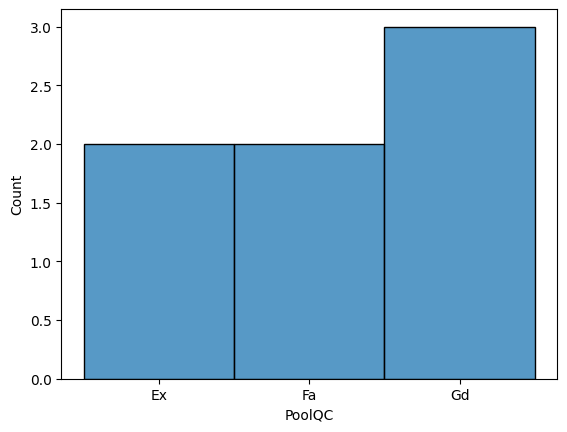

(1453, 82)


In [43]:
#Created a quick function to make individual variables easier to quick view
def show_stats_num(col):
    print(col.describe())
    print('\n\n')
    print(col.value_counts())
    plt.clf()
    sns.boxplot(x=col)
    plt.show()

def show_stats_cat(df, col):
    print(df[col].value_counts())
    plt.clf()
    sns.histplot(df, x=col)
    plt.show()

#show_stats_num(train.LotFrontage)
    
#show_stats_cat(train, 'Alley')
    
#show_stats_cat(train, 'MasVnrType')
    
#show_stats_num(train.MasVnrArea)
    
#show_stats_cat(train, 'BsmtQual')
    
#show_stats_cat(train, 'BsmtCond')
    
#show_stats_cat(train, 'BsmtExposure')
    
#show_stats_cat(train, 'BsmtFinType1')
#print(train[train['BsmtFinType1'].isna()][['BsmtFinType1', 'BsmtFinSF1']])

#show_stats_cat(train, 'BsmtFinType2')
#print(train[train['BsmtFinType2'].isna()][['BsmtFinType2', 'BsmtFinSF2']])

#show_stats_cat(train, 'Electrical')

#show_stats_cat(train, 'FireplaceQu')
#pd.set_option('display.max_rows', 50)
#print(train[train['FireplaceQu'].isna()][['FireplaceQu', 'Fireplaces']])

#show_stats_cat(train, 'GarageType')
#pd.set_option('display.max_rows', 100)
#print(train[train['GarageType'].isna()][['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCond']])

#show_stats_cat(train, 'GarageYrBlt')
#pd.set_option('display.max_rows', 100)
#print(train[train['GarageYrBlt'].isna()][['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCond']])

#show_stats_cat(train, 'GarageFinish')
#pd.set_option('display.max_rows', 100)
#print(train[train['GarageFinish'].isna()][['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCond']])

#show_stats_cat(train, 'GarageCond')
#pd.set_option('display.max_rows', 100)
#print(train[train['GarageCond'].isna()][['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCond']])

#show_stats_cat(train, 'PoolQC')
#print(train[(train['PoolQC'].isnull()) & (train['PoolArea']==0)].shape)

## Missing Data to handle
* LotFrontage (259)
    * Def: Linear feet of street connected to property
    * Decision: Fill with Median (less affected by outliers in data set)
* Alley (1369)
    * Def: Type of alley access
    * Assumption Taken: Most locations have no entry (1369 / 1460), indicating this field is MNAR (Missing Not At Random)
    * Decision: Fill with 'None'
* MasVnrType (872)
    * Def: Masonry veneer type
    * Assumption Taken: Over 1/2 of locations do not have this entry (872 / 1460), indicating this field is MNAR (Missing Not At Random)
    * Decision: Fill with 'None'
* MasVnrArea (8)
    * Def: Masonry veneer area in square feet
    * Assumption Taken: This value is depending on the location having a veneer in the first place, indicating this field is MNAR (Missing Not At Random)
    * Decision: Fill with 0
* BsmtQual (37)
    * Def: Height of the basement
    * Note: Defitions for values (Gd, TA, Ex, Fa) are not defined in data records and are less than 5% of data set.
    * Decision: Fill with 'Unknown' for now
* BsmtCond (37)
    * Def: General condition of the basement
    * Note: Defitions for values (TA, Gd, Fa, Po) are not defined in data records and are less than 5% of data set.
    * Decision: Fill with 'Unknown' for now
* BsmtExposure (38)
    * Def: Walkout or garden level basement walls
    * Note: Defitions for values (Gd, Mn, Av) are not defined in data records. Missing data is less than 5% of data set.
    * Assumption Taken: Data is MNAR (Missing Not At Random), meaning that missing values indicate there was nothing to prompt a recording and should have been marked as No
    * Decision: Fill with 'None'
* BsmtFinType1 (37)
    * Def: Quality of basement finished area
    * Note: Missing data is less than 5% of data set. BsmtFinType1 with null also have 0 square footage
    * Decision: Fill with 'None' 
* BsmtFinType2 (38)
    * Def: Quality of second finished area (if present)
    * Note: Missing data is less than 5% of data set. BsmtFinType2 with null (except 1 entry) have 0 square footage
    * Decision: Fill with 'None', remove index 332 (outlier data: basement SF without basement type)
* Electrical (1)
    * Def: Electrical system
    * Note: Missing data is only 1 record, therefore will fill with the 'Mode' of the data set
    * Assumption: SBrkr stands for Standard Breaker
    * Decision: Fill with 'SBrkr'
* FireplaceQu (690)
    * Def: Fireplace quality
    * Note: All missing records are paired with count of 0 Fireplaces. Missing data is almost 50% (690 / 1460) of data set.
    * Decision: Fill with 'No Fireplace'
* GarageType (81)
    * Def: Garage location
    * Note: All missing records are paired with other garage null instances. Missing data is ~5.6% of data set.
    * Decision: Fill with 'No Garage'
* GarageYrBlt (81)
    * Def: Year garage was built
    * Note: All missing records are paired with other garage null instances. Missing data is ~5.6% of data set.
    * Decision: Fill with 'No Garage'
* GarageFinish (81)
    * Def: Interior finish of the garage
    * Note: All missing records are paired with other garage null instances. Missing data is ~5.6% of data set.
    * Decision: Fill with 'No Garage'
* GarageQual (81)
    * Def: Garage quality
    * Note: All missing records are paired with other garage null instances. Missing data is ~5.6% of data set.
    * Decision: Fill with 'No Garage'
* GarageCond (81)
    * Def: Garage condition
    * Note: All missing records are paired with other garage null instances. Missing data is ~5.6% of data set.
    * Decision: Fill with 'No Garage'
* PoolQC (1453)
    * Def: Pool quality
    * Note: All records missing PoolQC have a PoolArea value of 0. Missing data is almost the complete data set (1453 / 1460)
    * Decision: Drop column, not enough data to use as a predictor
* Fence (1179)
    * Def: Fence quality
* MiscFeature (1406)
    * Def: Miscellaneous feature not covered in other categories
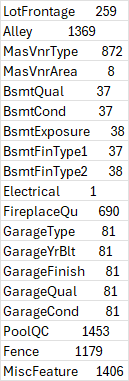
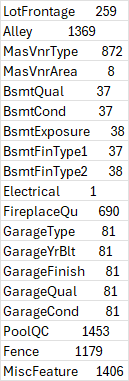
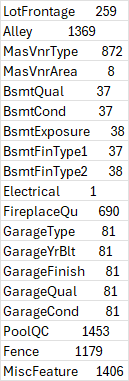
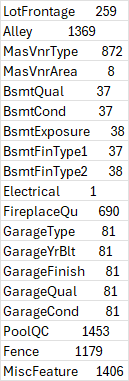

In [5]:
#Splitting data sets into numeric and categorical for investigation
train_numeric = train.select_dtypes(include='number')
print(train_numeric.columns)

train_categorical = train.select_dtypes(exclude='number')
print(train_categorical.columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', '

<Figure size 640x480 with 0 Axes>

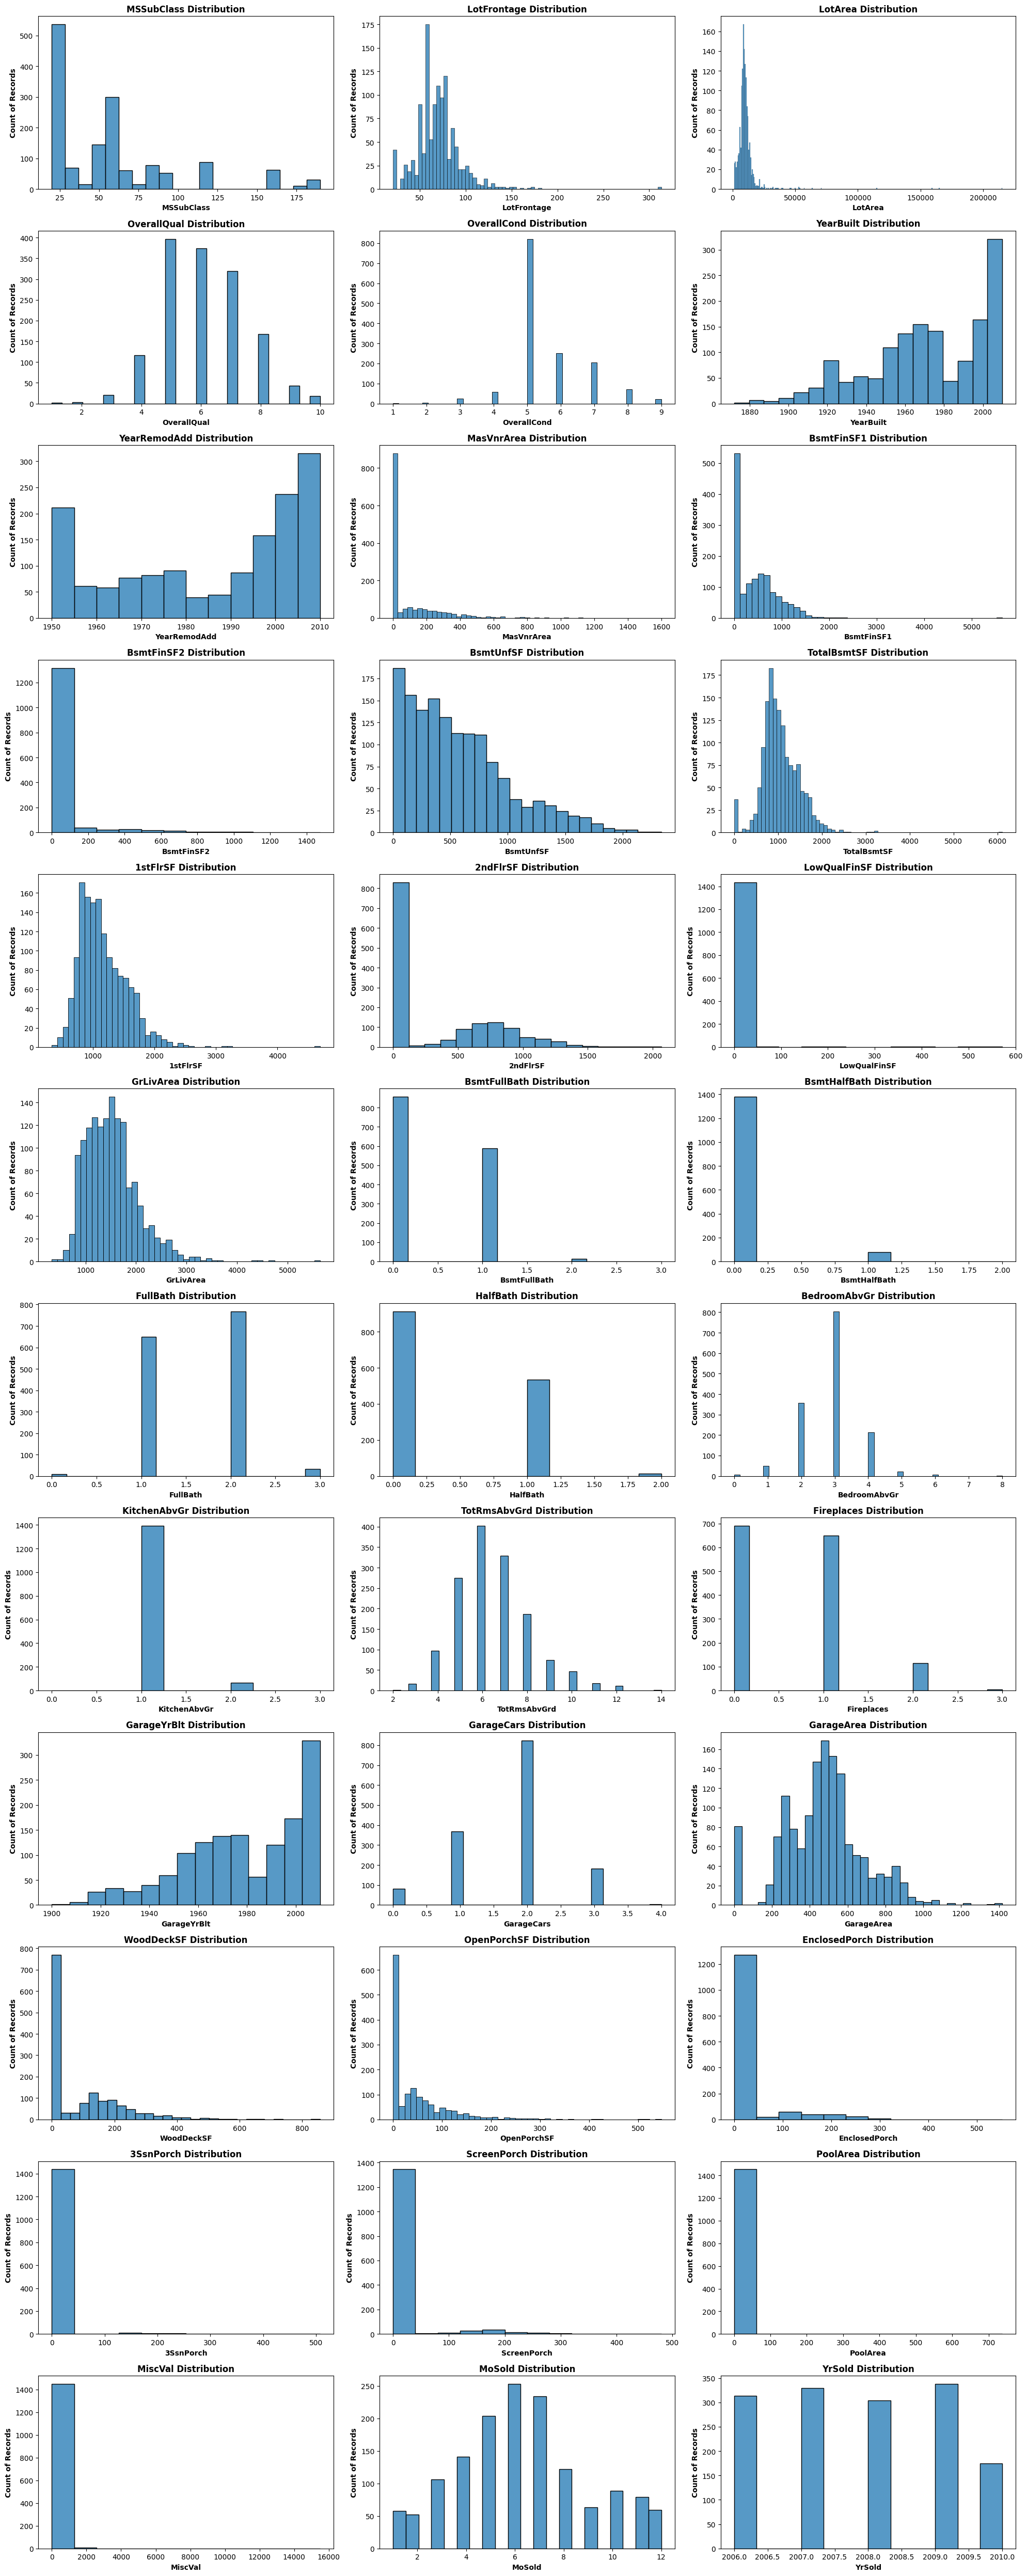

In [6]:
#Chart histrogram distributions of all numeric datasets for an initial look
#I'm enumerating here because I want to count through the columns, ignore columns 1 (user id) and also map these to a figure / flattened axes
plt.clf()
fig, axes = plt.subplots(12,3,figsize=(20, 50))
axes = axes.flatten()

#Dropping the Id and SalePrice Fields since I'm only concerned with checking histo distributions of the training data here
num_chart_data = train_numeric.drop(columns=['Id', 'SalePrice'])

for i, col in enumerate(num_chart_data.columns):
    sns.histplot(num_chart_data, x=col, ax = axes[i])
    axes[i].set_title(col +' Distribution', fontweight='bold')
    axes[i].set_xlabel(col, fontweight='bold')
    axes[i].set_ylabel('Count of Records', fontweight='bold')

plt.tight_layout()
plt.show()

#Distro Findings (Normal Curve Shape): LotFrontage, OverallQual, OverallCond, TotalBsmtSF, 1stFlrSF, GrLivArea, BedroomAbvGr, TotRmsAbvGrd, MoSold

<Figure size 640x480 with 0 Axes>

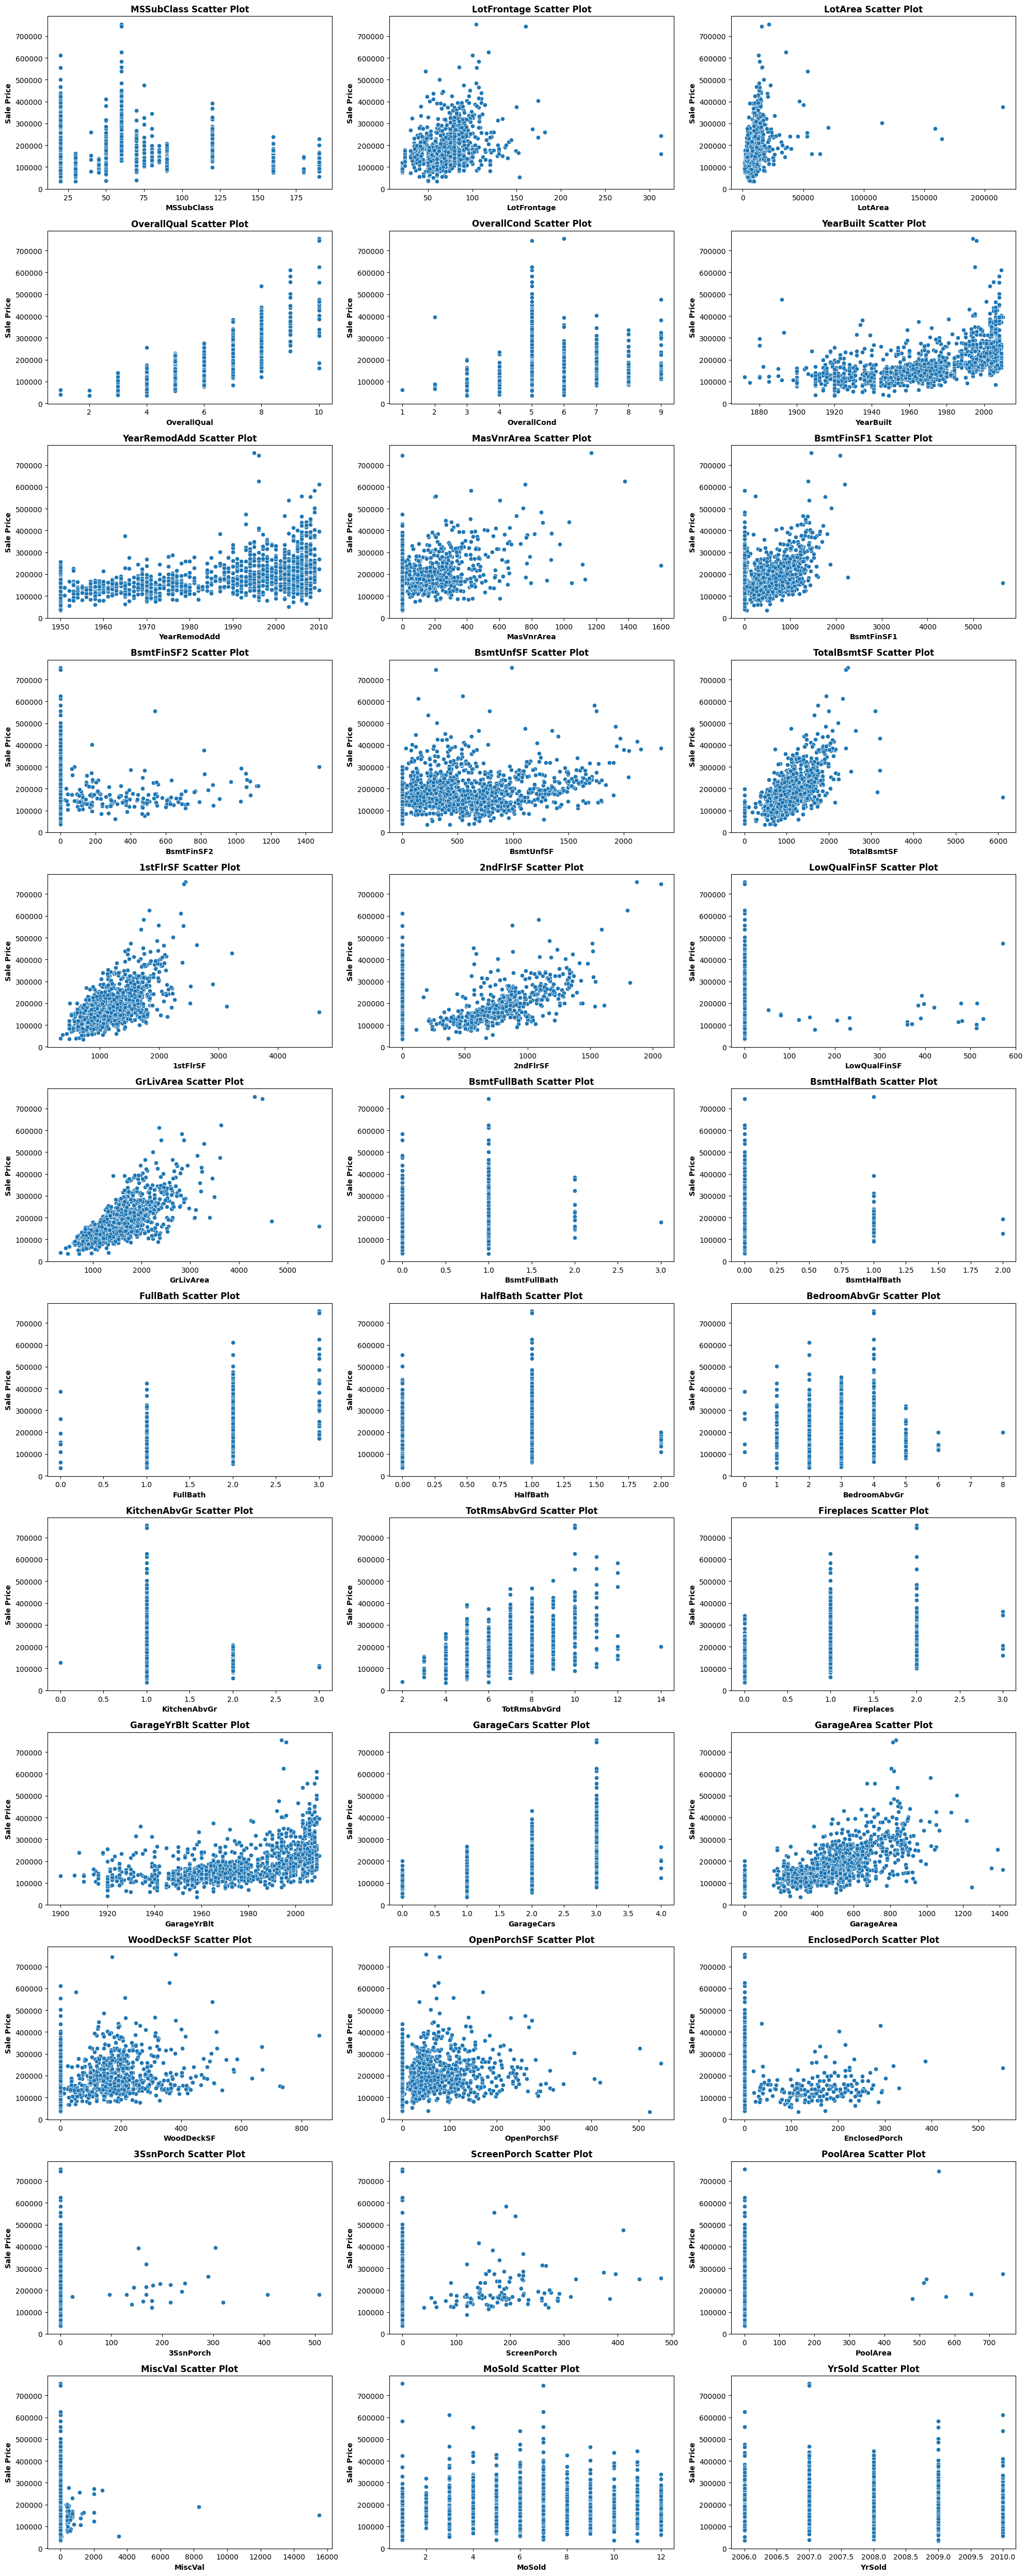

In [7]:
#Scatter distribution of numeric data in relation to SalePrice (looking for linearity vs SalePrice)
plt.clf()
fig, axes = plt.subplots(12,3,figsize=(20, 50))
axes = axes.flatten()

num_chart_data = train_numeric.drop(columns=['Id'])

for i, col in enumerate(num_chart_data.columns):
    if col != 'SalePrice':
        sns.scatterplot(num_chart_data, x=col, y='SalePrice', ax = axes[i])
        axes[i].set_title(col +' Scatter Plot', fontweight='bold')
        axes[i].set_xlabel(col, fontweight='bold')
        axes[i].set_ylabel('Sale Price', fontweight='bold')

plt.tight_layout()
plt.show()

#Scatter Findings (Linear Relationship): LotFrontage, BsmtFinSF1, TotalBsmtSF, 1stFlrSF, GrLivArea

In [8]:
#Combine train and test data sets

test['SalePrice'] = np.NaN
train['train_test'] = 1 #training data labeled as 1
test['train_test'] = 0 #test data labeled as 0

all_data = pd.concat([train, test], axis=0)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  